<a href="https://colab.research.google.com/github/raz0208/Natural-Gas-Price-Interpolation-Forecasting/blob/main/Advance_Quantitative_Research-Natural_Gas_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Gas Price Interpolation Forecasting

In [1]:
# Import Required Libraries and Pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and Read dataset
df = pd.read_csv('Nat_Gas.csv')

df.head(10)

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


## Data Inspection And Undrestanding

In [3]:
# Check and convert data column to date format
df['Dates'] = pd.to_datetime(df['Dates'])

# Sort the data by "date"
df = df.sort_values("Dates")

# Check for duplication
duplicates = df.duplicated().sum()

# Check for Missing Values
missing_val = df.isnull().sum()

# Print the info
print("Duplicate data = ", duplicates)
print("Missing Values = ", missing_val, "\n")

# Print summary of the dataset
summary_stats = df['Prices'].describe()
print("\nSummary statistics:\n", summary_stats, "\n")

# Print the sorted dataset
df.head(10)

Duplicate data =  0
Missing Values =  Dates     0
Prices    0
dtype: int64 


Summary statistics:
 count    48.000000
mean     11.207083
std       0.757897
min       9.840000
25%      10.650000
50%      11.300000
75%      11.625000
max      12.800000
Name: Prices, dtype: float64 



,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


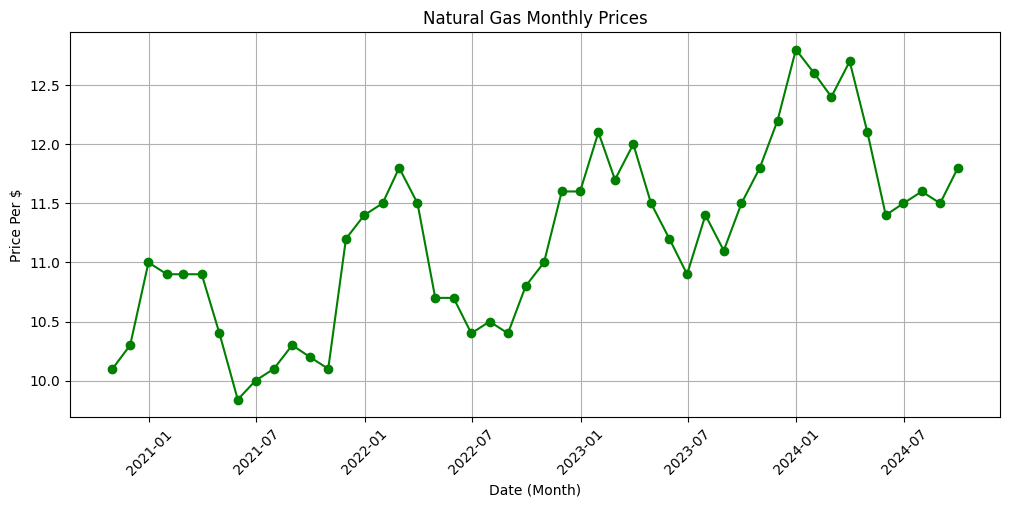

In [4]:
# Visualise the data
plt.figure(figsize=(12, 5))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-', color='green')
plt.title('Natural Gas Monthly Prices')
plt.xlabel('Date (Month)')
plt.ylabel('Price Per $')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

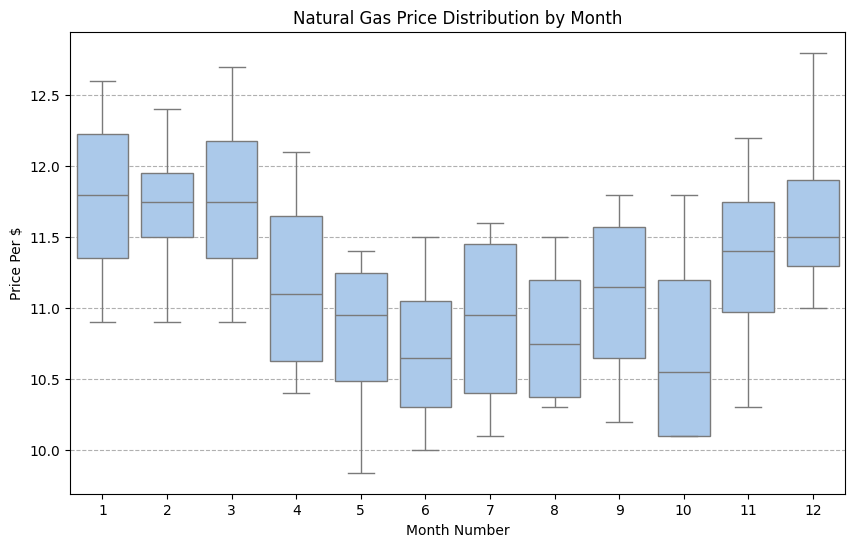

In [26]:
# Copy dataset
Monthdf = df.copy()

# Extract the month number
Monthdf['Month'] = df['Dates'].dt.month

# Create a box plot to show price distribution by month
plt.figure(figsize=(10, 6))
# Order the months from 1 to 12
month_order = list(range(1, 13))
sns.boxplot(x='Month', y='Prices', data=Monthdf, order=month_order)
plt.title('Natural Gas Price Distribution by Month')
plt.xlabel('Month Number')
plt.ylabel('Price Per $')
plt.grid(axis='y', linestyle='--')
plt.savefig('nat_gas_price_distribution_by_month_boxplot.png')

## Decomposition
